### importing libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.io import loadmat

### loading the ([dot]*mat* *file* )

In [6]:
data_mat = loadmat('/content/drive/MyDrive/MachineLearning/assignment10/ex4data1.mat')
data_mat 

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [23]:
data_mat['X'].shape , type(data_mat['X'])

((5000, 400), numpy.ndarray)

In [32]:
images = data_mat['X']
label = data_mat['y']

## Checking the first image

In [33]:
images[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [38]:
# 
# type(images[0])
images[0].shape

(400,)

In [95]:
img1 = images[0].reshape(20,20)

In [88]:
img1.shape

(20, 20)

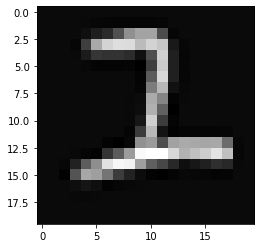

In [89]:
plt.imshow(img1,cmap='gray')

## Initialisation of learning rate, epochs, neurons in hidden layer, neurons in output layer

<img class="XqHOTb IGEbUc" alt="S(x)= \frac {1}{1+e^{-x}}" src="https://www.yourdatateacher.com/wp-content/uploads/2021/04/neural-network.png" role="img" data-atf="0" data-frt="0" Width='500' Height='200'>

In [92]:
# Initialize variables
learning_rate = 0.1
epochs = 7500
N = label.size

# number of input features
input_size = 400

# number of hidden layers neurons
hidden_size = 25

# number of neurons at the output layer
output_size = 10  

results = pd.DataFrame(columns=["mse", "accuracy"])

## Creating the Hidden and Output Layer

In [97]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [98]:
W1.shape, W2.shape

((400, 25), (25, 10))

## Defining the Sigmoid Function
<img class="XqHOTb IGEbUc" alt="S(x)= \frac {1}{1+e^{-x}}" src="https://www.gstatic.com/education/formulas2/397133473/en/sigmoid_function.svg" role="img" data-atf="0" data-frt="0">

In [60]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [94]:
epochs = 2 * epochs
for itr in range(epochs):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(images, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, label)
    acc = accuracy(A2, label)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - label
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(images.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

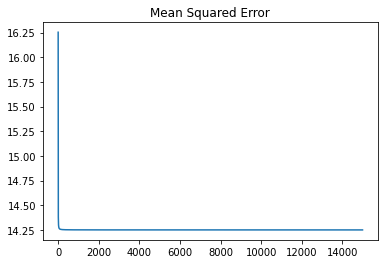

In [104]:
results.mse.plot(title="Mean Squared Error")

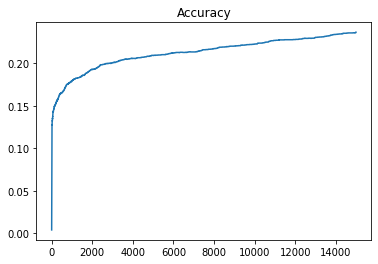

In [105]:
results.accuracy.plot(title="Accuracy")

## Making Prediction <br>
Taking the input of the image and feed forward to the network only one time and output the highest probability of the last 10 neuron

In [142]:
class Model:
  def __init__(self):
    self.test_image = test_image

  def predict(self,img):
    HI_in_layer = np.dot(img, W1)
    HI_out_layer = sigmoid(HI_in_layer)

    out_in_layer = np.dot(HI_out_layer, W2)
    out_out_layer = sigmoid(out_in_layer)

    plt.imshow(img.reshape(20,20),cmap="gray")
    print(f"Predicted digit = {np.argmax(out_out_layer)} \n")

Predicted digit = 3 



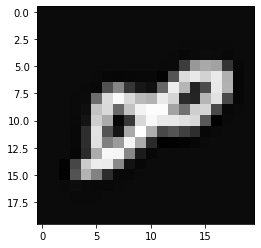

In [146]:
test_image = images[-1000]
model = Model()
model.predict(test_image)

2.8.0
